# Modelo 2

Aqui se confecciona la red neuronal del modelo 2 que clasifica al pilote en condicion de daño severo y daño muy severo.

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

import pandas as pd
import numpy as np

from variables import plot_up

In [2]:
X = pd.read_csv("dataset/df_input_norm.csv")
y = pd.read_csv("dataset/df_output_norm.csv")
y = y[y["Leve/Severo"] == 1]  
nuevo = pd.concat([X, y], axis=1)
nuevo = nuevo[nuevo["Leve/Severo"] == 1]
X = nuevo.iloc[:, 0:2].reset_index(drop=True)
y = nuevo.iloc[:, 2:3].reset_index(drop=True)

In [3]:
from sklearn.model_selection import train_test_split

X_train_0, X_test, y_train_0, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train_0, y_train_0, test_size=0.2, random_state=42)

In [5]:
model = Sequential()
model.add(Dense(2, activation = "relu", input_dim = 2))
model.add(Dense(4, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="sigmoid"))
model.add(Dense(units = 1))

In [6]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, batch_size = 8, epochs = 12, validation_data=(X_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 345 samples, validate on 87 samples
Epoch 1/12
345/345 [==============================] - 0s 939us/step - loss: 0.9752 - accuracy: 0.5449 - val_loss: 0.6968 - val_accuracy: 0.6782
Epoch 2/12
345/345 [==============================] - 0s 214us/step - loss: 0.7560 - accuracy: 0.5362 - val_loss: 0.6626 - val_accuracy: 0.6782
Epoch 3/12
345/345 [==============================] - 0s 200us/step - loss: 0.7219 - accuracy: 0.5884 - val_loss: 0.6373 - val_accuracy: 0.6552
Epoch 4/12
345/345 [==============================] - 0s 217us/step - loss: 0.6916 - accuracy: 0.5942 - val_loss: 0.6137 - val_accuracy: 0.6552
Epoch 5/12
345/345 [==============================] - 0s 214us/step - loss: 0.6621 - accuracy: 0.6319 - val_loss: 0.5924 - val_accuracy: 0.6552
Epoch 6/12
345/345 [==============================] - 0s 191us/step - loss: 0.6333 - accuracy: 0.6290 - val_loss: 0.5590 - val_accuracy: 0.6

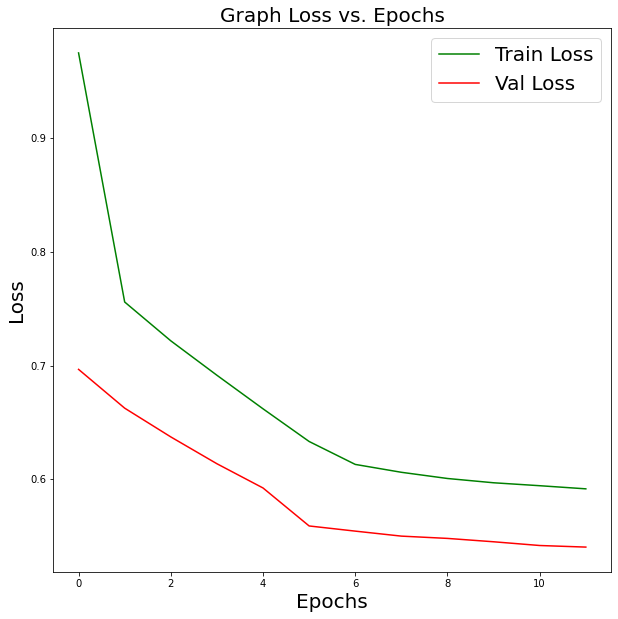

In [8]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(10,10))
epocas = range(0,12)
plt.plot(epocas,loss , 'r-', c="g", label='Train Loss')
plt.plot(epocas,val_loss , 'r-', c="r", label='Val Loss')
plt.title('Graph Loss vs. Epochs', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss',size=20)
plt.legend( prop={'size': 20})
plt.show()

In [9]:
model.evaluate(X_test, y_test)

108/108 [==============================] - 0s 56us/step


[0.5828194949362013, 0.75]